## Covid-19 Micro Analysis Using Pandas

We have taken a small dataset of covid-19 data just to understand Pandas Library understaning purpose. 

The date used here is till 29-April-2020, and has records as on 29-April-2020.

The data is available as a excel/csv file, which is downloaded from the kaggle. We can use the entire dataset for the analysis using Pandas Library.

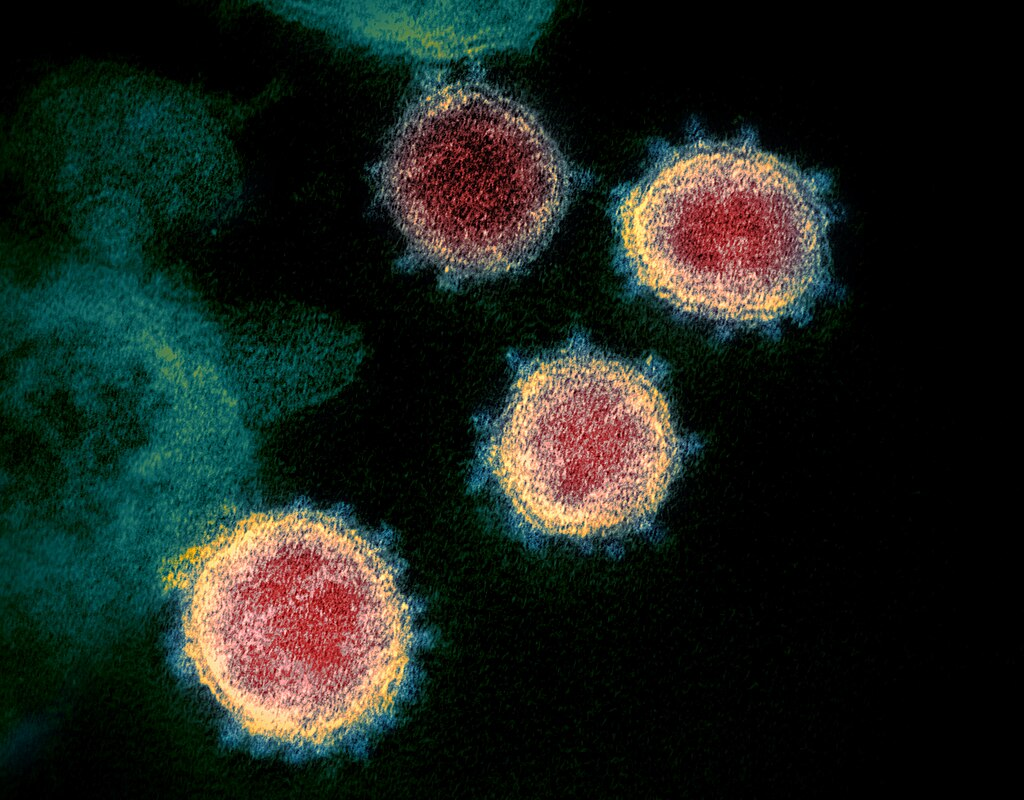

In [32]:
import pandas as pd

In [33]:
df=pd.read_csv("covid_19_data.csv")

In [34]:
df.head(5)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [35]:
df.count() # total count column wise

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [36]:
df.isnull().sum() ## Missing Value

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [37]:
# Get the null values in the form of Heatmap using seaborn, matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

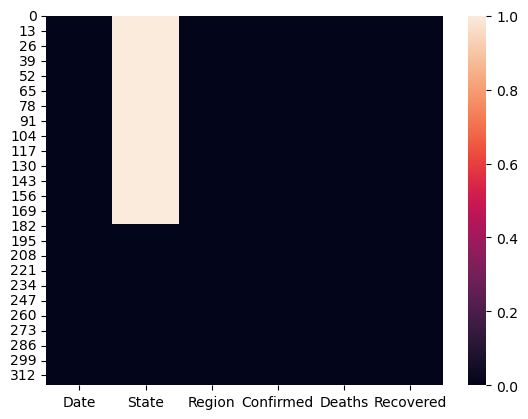

In [38]:
sns.heatmap(df.isnull())
plt.show()

In [39]:
# Show the number of confirmed, Deaths and Recovered cases in each region.

df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [40]:
df.groupby("Region").sum().head(10)

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
Antigua and Barbuda,4/29/2020,0,24,3,11
Argentina,4/29/2020,0,4285,214,1192
Armenia,4/29/2020,0,1932,30,900
Australia,4/29/20204/29/20204/29/20204/29/20204/29/20204...,Australian Capital TerritoryNew South WalesNor...,6752,91,5715


In [41]:
df.groupby("Region")["Confirmed"].sum().sort_values(ascending=False).head()

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

In [42]:
# Get the confirmed and recovered data

df.groupby("Region")[["Confirmed","Recovered"]].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


In [43]:
# Remove the records where Confirmed cases is less than 10

df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [44]:
df.Confirmed

0      1939
1       766
2      3848
3       743
4        27
       ... 
316     545
317      76
318      11
319     185
320    1268
Name: Confirmed, Length: 321, dtype: int64

In [45]:
df.Confirmed<10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [46]:
df[df.Confirmed<10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


Now remove the above outcome from the data

In [47]:
df=df[~(df.Confirmed<10)]   # we can use ~ to remove the record permanently

In [48]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [49]:
df[df.Confirmed<10] # to verify

,Date,State,Region,Confirmed,Deaths,Recovered


# In Which region, maximum number of Confirmed cases were recorded?

In [50]:
df.groupby("Region")["Confirmed"].sum().head()

Region
Afghanistan    1939
Albania         766
Algeria        3848
Andorra         743
Angola           27
Name: Confirmed, dtype: int64

In [51]:
 #  Top 20 region
df.groupby("Region")['Confirmed'].sum().sort_values(ascending=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Brazil              79685
Canada              52860
Belgium             47859
Netherlands         38993
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

# In which region, minimum number of Deaths cases were recorded?

In [52]:
# Top 50 region

df.groupby("Region").Deaths.sum().sort_values(ascending = True).head(50)

Region
Cambodia                            0
Fiji                                0
Dominica                            0
Central African Republic            0
Eritrea                             0
Laos                                0
Holy See                            0
Nepal                               0
Madagascar                          0
Macau                               0
Mozambique                          0
Mongolia                            0
Namibia                             0
Grenada                             0
Saint Lucia                         0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Seychelles                          0
South Sudan                         0
Rwanda                              0
Saint Kitts and Nevis               0
Vietnam                             0
Liechtenstein                       1
Benin                               1
Gambia                              1
Eswat

# How many Confirmed, Deaths & Recovered cases where reported from India till 29 april 2020

In [53]:
df[df.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


# Sort the entire data wrt No. of Confirmed cases in ascending order? 

In [55]:
df.sort_values(by=["Confirmed"], ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
156,4/29/2020,NaN,Suriname,10,1,8
27,4/29/2020,NaN,Burundi,11,1,4
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


# Sort the entire data wrt No. of Recovered cases in descending order?

In [58]:
df.sort_values(by=['Recovered'], ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
270,4/29/2020,Northern Mariana Islands,US,14,2,0
299,4/29/2020,South Dakota,US,2373,13,0
298,4/29/2020,South Carolina,US,5882,231,0
302,4/29/2020,Tennessee,US,10366,195,0


## In this project, a mini dataset related to the covid-19 pandemic is taken and analysed in a very Easy to understand language.